## Detailed Article Explaination

The detailed code explanation for this article is available at the following link:

https://www.daniweb.com/programming/computer-science/tutorials/542420/text-and-image-to-video-generation-using-diffusion-models-in-hugging-face

For my other articles for Daniweb.com, please see this link:

https://www.daniweb.com/members/1235222/usmanmalik57

## Importing and Installing Required Libraries

In [ ]:
!pip install --upgrade transformers accelerate diffusers imageio-ffmpeg

In [ ]:
import torch
from diffusers import CogVideoXPipeline
from diffusers.utils import export_to_video

from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image

## Text to Video Generation with Hugging Face Diffusers

In [ ]:
text_video_pipe = CogVideoXPipeline.from_pretrained(
    "THUDM/CogVideoX-2b",
    torch_dtype=torch.float16
)

text_video_pipe.enable_model_cpu_offload()
text_video_pipe.enable_sequential_cpu_offload()
text_video_pipe.vae.enable_slicing()
text_video_pipe.vae.enable_tiling()

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
prompt = "A white dog running on a Caribbean beach."

video = text_video_pipe(
    prompt=prompt,
    num_videos_per_prompt=1,
    num_inference_steps=50,
    num_frames=49,
    guidance_scale=6,
    generator=torch.Generator(device="cuda").manual_seed(42),
).frames[0]

export_to_video(video, "text_to_video.mp4", fps=8)


  0%|          | 0/50 [00:00<?, ?it/s]

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


'text_to_video.mp4'

## Image to Video Generation with Hugging Face Diffusers

In [ ]:
image_video_pipe = StableVideoDiffusionPipeline.from_pretrained(
    "stabilityai/stable-video-diffusion-img2vid",
    torch_dtype=torch.float16,
    variant="fp16"
)
image_video_pipe.enable_model_cpu_offload()

model_index.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

image_encoder/config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/986 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/3.05G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/196M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

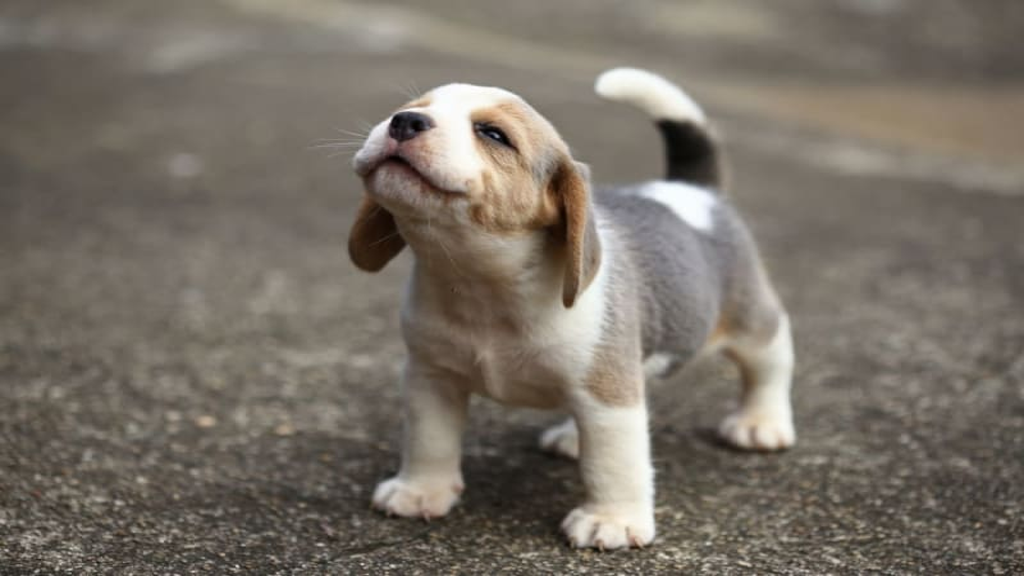

In [35]:
## Image link: https://www.brookhavenanimalhosp.com/site/blog/2022/11/15/15-cute-dog-breeds-that-stay-small-forever
image = load_image("/content/image-73073-800.jpg")
image = image.resize((1024, 576))
image

In [36]:
frames = image_video_pipe(image, num_frames=28).frames[0]

  0%|          | 0/25 [00:00<?, ?it/s]

In [37]:
export_to_video(frames, "image_to_video.mp4", fps=7)

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


'image_to_video.mp4'